## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load CSV into DataFrame

In [2]:
df = pd.read_csv('employee_data2.csv')

## 3. Ensure salary values are numeric

In [3]:
if 'salary' in df.columns:
    df['salary'] = pd.to_numeric(df['salary'].replace({'\$': '', ',': ''}, regex=True))

## 4. Check for missing values

In [4]:
print(df.isnull().sum())

employee_id             0
name                    0
gender                  0
age                   181
salary                301
department              0
overtime_hours         94
performance_rating    233
hire_date               0
dtype: int64


In [5]:
# Filling missing numerical values with mean
numeric_cols = ['age', 'salary', 'overtime_hours', 'performance_rating']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Filling missing categorical values with mode
categorical_cols = ['department', 'gender']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

## 5. Check for duplicates

In [6]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 10


In [7]:
df.drop_duplicates(inplace=True)

## 6. Identify missing values and summarize

In [8]:
describe_df = df.describe()
print(describe_df)

        employee_id          age         salary  overtime_hours  \
count   2000.000000  2000.000000    2000.000000     2000.000000   
mean   50956.576000    40.971461   73923.750569       30.397545   
std    28520.679608    10.619373   23998.759862       17.129652   
min       51.000000    22.000000   30085.120000        0.000000   
25%    26175.000000    32.750000   54947.262500       16.000000   
50%    51436.500000    40.988518   73950.498882       30.394572   
75%    75498.750000    49.250000   91689.517500       45.000000   
max    99997.000000    60.000000  119953.090000       60.000000   

       performance_rating  
count         2000.000000  
mean             3.002065  
std              1.325471  
min              1.000000  
25%              2.000000  
50%              3.000000  
75%              4.000000  
max              5.000000  


## 7. Dataset dimensions and data types

In [9]:
df.shape

(2000, 9)

In [10]:
df.dtypes

employee_id             int64
name                   object
gender                 object
age                   float64
salary                float64
department             object
overtime_hours        float64
performance_rating    float64
hire_date              object
dtype: object

## 8. Convert incorrect data types

In [11]:
if 'hire_date' in df.columns:
    df['hire_date'] = pd.to_datetime(df['hire_date'])

## 9. Normalize numerical variables

In [12]:
if 'salary' in df.columns:
    scaler = MinMaxScaler()
    df['salary_normalized'] = scaler.fit_transform(df[['salary']])

## 10. Extract years with company

In [13]:
if 'hire_date' in df.columns:
    df['years_with_company'] = pd.Timestamp.now().year - df['hire_date'].dt.year

## 11. Handle outliers in salary

In [14]:
if 'salary' in df.columns:
    Q1 = df['salary'].quantile(0.25)
    Q3 = df['salary'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR)))]

## 12. Clean column names

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## 13. Merge with performance ratings (example, assuming performance.csv exists)

In [16]:
# performance_df = pd.read_csv('/mnt/data/performance.csv')
# df = df.merge(performance_df, on='employee_id', how='left')

## 14. Calculate average salary per department

In [17]:
if 'department' in df.columns and 'salary' in df.columns:
    avg_salary_by_dept = df.groupby('department')['salary'].mean()
    print(avg_salary_by_dept)

department
Finance      73726.445805
HR           74158.832926
IT           73545.804089
Marketing    73365.803068
Sales        74805.749438
Name: salary, dtype: float64


## 15. Filter employees with overtime > 50 hours

In [18]:
if 'overtime_hours' in df.columns:
    overtime_workers = df[df['overtime_hours'] > 50]
    print(overtime_workers)

      employee_id             name      gender   age         salary  \
11          85090   James Marshall      Female  55.0   78334.970000   
15          62846   Nicole Johnson  Non-binary  31.0   53432.980000   
16          25761    Emily Simpson        Male  60.0   37962.600000   
20          62152      Zachary Kim        Male  25.0   36777.640000   
24          55530     Michele Ward        Male  50.0   78097.290000   
...           ...              ...         ...   ...            ...   
1973        91724     David Carson  Non-binary  59.0   73950.498882   
1974        51536     Jeffery Love  Non-binary  49.0   57444.110000   
1975        27588     Darryl Weber  Non-binary  48.0   78244.040000   
1983        43638    Alexandra Ray      Female  46.0  109537.250000   
1985         2025  Mr. Peter Jones  Non-binary  40.0   41470.330000   

     department  overtime_hours  performance_rating  hire_date  \
11           IT            51.0                 5.0 2021-02-25   
15           IT

## 16. Detect and remove outliers

In [19]:
if 'age' in df.columns:
    Q1 = df['age'].quantile(0.25)
    Q3 = df['age'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

## Export Cleaned Dataset

In [24]:
df.to_csv("cleaned_employee_data.csv", index=False)

## 17. Visualize data with Seaborn

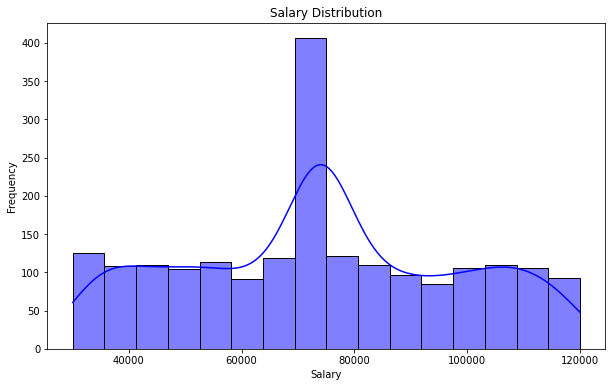

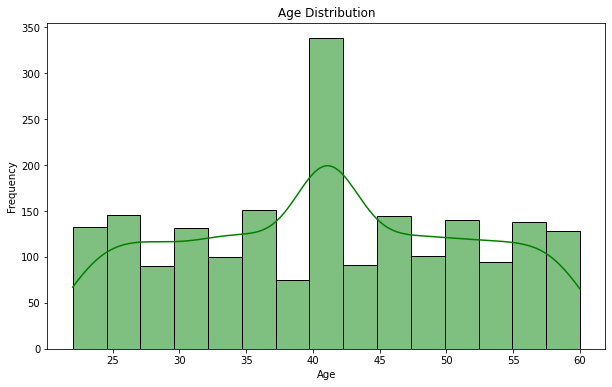

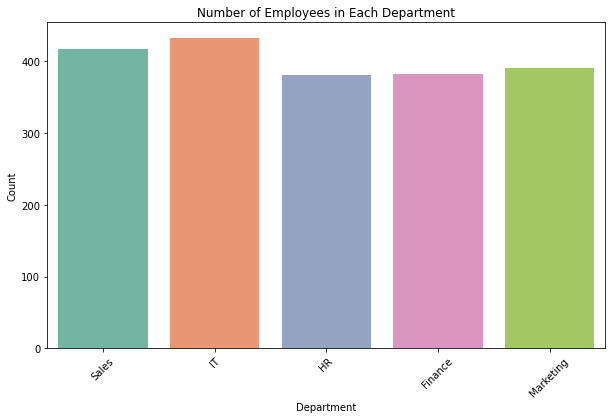

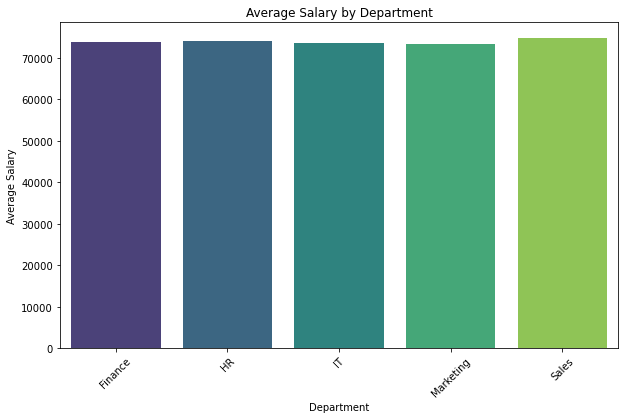

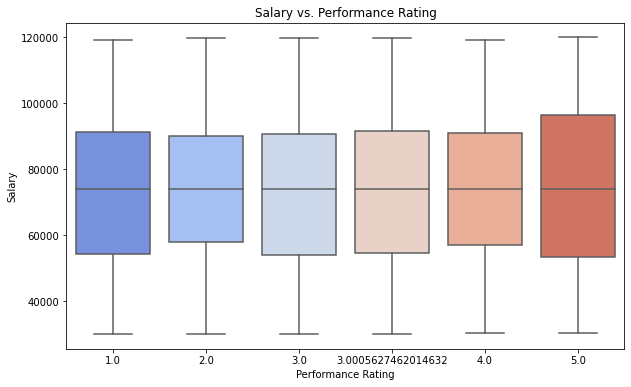

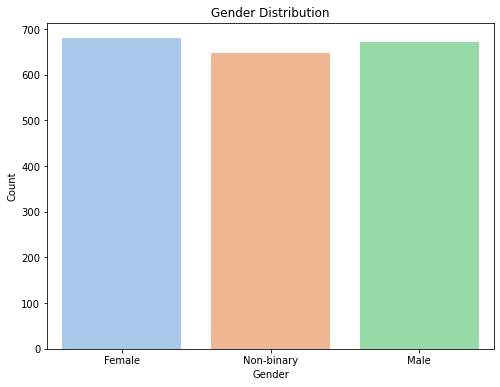

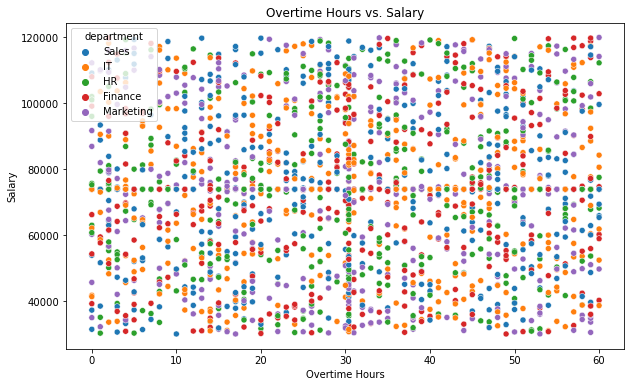

In [25]:
# 1. Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# 2. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3. Count of employees by department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', palette='Set2')
plt.title("Number of Employees in Each Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Average salary by department
plt.figure(figsize=(10, 6))
avg_salary_by_dept = df.groupby("department")['salary'].mean().reset_index()
sns.barplot(data=avg_salary_by_dept, x='department', y='salary', palette='viridis')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

# 5. Salary vs. Performance Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='performance_rating', y='salary', data=df, palette='coolwarm')
plt.title("Salary vs. Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Salary")
plt.show()

# 6. Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 7. Overtime hours vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='overtime_hours', y='salary', hue='department', palette='tab10')
plt.title("Overtime Hours vs. Salary")
plt.xlabel("Overtime Hours")
plt.ylabel("Salary")
plt.show()